In [1]:
#https://www.python-course.eu/neural_network_mnist.php

In [37]:
import os 
os.getcwd()
os.chdir("C:\\Users\\duygu\\Desktop\\görüntü işleme\\4.hafta")
os.listdir()

['hafta4.ipynb', 'iki.jpg', 'mnist_test.csv', 'mnist_train.csv', 'ödev.txt']

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_path="C:\\Users\\duygu\\Desktop\\görüntü işleme\\4.hafta"
train_data = np.loadtxt(data_path + "//mnist_train.csv", delimiter=",")
test_data = np.loadtxt(data_path + "//mnist_test.csv", delimiter=",")

In [6]:
image_size = 28 #boy ve uzunluk
no_of_different_labels = 10 # örneğin 0,1,2,3,...,9
image_pixels = image_size * image_size

test_data[:10]

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [14]:
train_data.ndim, train_data.shape # 785=28*28+1   Her bir resmin boyutları
train_data[10,0]                  # 10. satıra ait ilk eleman


3.0

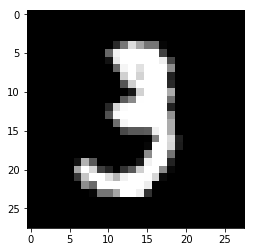

In [17]:
im_3=train_data[10,:]
im_3.shape
im_4=im_3[1:]
im_4.shape
im_5=im_4.reshape(28,28)
plt.imshow(im_5,cmap='gray')
plt.show()

In [18]:
60000, 785 ; 1 + 28*28

785

In [19]:
m,n=train_data.shape    #60000 data row 785 pixel
m,n

(60000, 785)

In [20]:
s=0
for i in range(m):
    if (train_data[i,0]==3):
        s=s+1
        
s #train_data nın ilk sütununda kaç tane 3 var

6131

In [21]:
def my_counter(k=0):
    s=0
    for i in range(m):
        if (train_data[i,0]==3):
            s=s+1
    return s
for i in range(10):
    c=my_counter(i)
    print(i," ",c)

0   6131
1   6131
2   6131
3   6131
4   6131
5   6131
6   6131
7   6131
8   6131
9   6131


In [22]:
m,n=train_data.shape
m,n

(60000, 785)

In [23]:
import math
def my_pdf_1(x, mu=0.0, sigma=1.0):
    x = float(x - mu) / sigma
    return math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / sigma
my_pdf_1(10,1,3)

0.001477282803979336

In [24]:
for i in range(m):
    digit_class=train_data[i,0]     #ilk sütun verileri
    top_left=train_data[i,1]        #sol üst köşedeki değer
    bottom_right=train_data[i,784]  #sağ alt köşedeki değer
    print(digit_class,end=" ")
    print(top_left,end=" ")
    print(bottom_right,end=" ")

5.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 6.0 

2.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 8.0 

 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0

0.0 5.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 

9.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 0.0 

0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 

 8.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 8.0

0.0 5.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 

 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0

0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 

0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 

 0.0 5.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0

0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 

 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0

8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 4.0 

8.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 0.0 

 5.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 1.0

0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 

 0.0 0.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0

0.0 5.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 

 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0

 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0

 2.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0

 1.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0

 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0

0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 

5.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 8.0 

5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 

 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 3.0

6.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 5.0 

2.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 

 1.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0

 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 9.0

2.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 9.0 

 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 1.0

 0.0 0.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0

 2.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0

 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0

 0.0 2.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0

 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0

0.0 3.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 

0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 

 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0

0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 

7.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 

0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 

 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0

 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0

8.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 0.0 

 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 4.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 5.0 0.0 0.0 4.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0

3.0 0.0 0.0 5.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 9.0 0.0 0.0 7.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 1.0 0.0 0.0 7.0 0.0 0.0 5.0 0.0 0.0 5.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 5.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 8.0 0.0 0.0 4.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 

0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 8.0 0.0 0.0 7.0 0.0 0.0 2.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 8.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 7.0 0.0 0.0 3.0 0.0 0.0 6.0 0.0 0.0 8.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 6.0 0.0 0.0 5.0 0.0 0.0 8.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 1.0 0.0 0.0 9.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 9.0 0.0 0.0 5.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 9.0 0.0 0.0 4.0 0.0 0.0 8.0 0.0 0.0 3.0 0.0 0.0 7.0 0.0 0.0 7.0 0.0 0.0 6.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 0.0 5.0 0.0 0.0 6.0 0.0 0.0 7.0 0.0 0.0 8.0 0.0 0.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 3.0 0.0 0.0 4.0 0.0 

In [30]:
s=0                   #adet sayısı
k=0                   #sınıf bilgisi (bilgisi istenen sayı)
t=0
l=350 #locaationn     #500.pikseldeki ortalama değer
for i in range(m):
    if(train_data[i,0]==k):
        s=s+1
        t=t+train_data[i,l+1]   #belirtilen lokasyondaki(sütundaki) bütün verilerin toplanması
mean_1=t/s                      #sutun toplamı/sayı adedi (ortalama değer)

s,t=0,0
for i in range(m):
    if(train_data[i,0]==k):
        s=s+1
        diff_1=train_data[i,l+1]-mean_1
        t=t+diff_1*diff_1
std_1=np.sqrt(t/(s-1))
print(mean_1,std_1)

22.705723450953908 61.8672005389669


In [31]:
def get_my_mean_and_std(k=0,l=0):
    
    #k=0  #hangi digit
    #l=0  #konum bilgisi
    s=0  #kaç tane bilgisi                 #resimdeki belli bir piksele ait yoğunluğun bulunması (ortalama değer)
    t=0
    for i in range(m):
        if(train_data[i,0]==k):
            s=s+1
            t=t+train_data[i,l+1]
    mean_1=t/s

    s,t=0,0
    for i in range(m):                 #varyans değeri
        if(train_data[i,0]==k):
            s=s+1
            diff_1=train_data[i,l+1]-mean_1
            t=t + diff_1*diff_1
    std_1=np.sqrt(t/(s-1))

    print(mean_1,std_1)
    return mean_1,std_1

In [32]:
get_my_mean_and_std(2,100)

35.8611950318899 76.89200060020755


(35.8611950318899, 76.89200060020755)

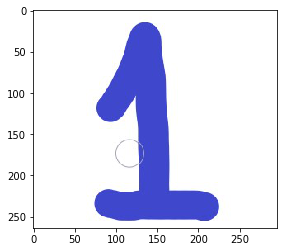

In [59]:
im_1=plt.imread('iki.jpg')
plt.imshow(im_1)
plt.show()
test_value=im_1[0,0,0]

In [39]:
m_1,std_1=get_my_mean_and_std(2,100)
my_pdf_1(test_value,m_1,std_1)

35.8611950318899 76.89200060020755


8.939333047950803e-05